In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv("Motor_Vehicle_Crashes.csv")
print(data.dtypes)
print(data.shape)

C:\Users\jeffr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [3]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMTIME
0,11/7/2019,8:10,NaN,NaN,40.887352,-73.905340,POINT (-73.90534 40.887352),WEST 238 STREET,NaN,NaN,...,NaN,NaN,NaN,4237328,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,8.17
1,11/27/2019,13:31,NaN,NaN,40.664948,-73.942620,POINT (-73.94262 40.664948),KINGSTON AVENUE,NaN,NaN,...,NaN,NaN,NaN,4251305,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,13.52
2,11/17/2019,9:15,QUEENS,11374,40.726185,-73.870220,POINT (-73.87022 40.726185),WOODHAVEN BOULEVARD,62 ROAD,NaN,...,NaN,NaN,NaN,4242260,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,9.25
3,12/1/2019,1:09,BRONX,10459,40.820984,-73.891624,POINT (-73.891624 40.820984),EAST 163 STREET,SOUTHERN BOULEVARD,NaN,...,NaN,NaN,NaN,4250971,Sedan,Sedan,NaN,NaN,NaN,1.15
4,11/7/2019,18:00,NaN,NaN,NaN,NaN,NaN,FLATBUSH AVENUE,EASTERN PARKWAY,NaN,...,NaN,NaN,NaN,4237356,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,18.00


In [4]:
#data=data[['LATITUDE','LONGITUDE','ON STREET NAME','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2']]
print(data['LATITUDE'].isna().sum())
print(data['LONGITUDE'].isna().sum())
print((data['LATITUDE']==0).sum())
print((data['LONGITUDE']==0).sum())

103666
103666
1118
1118


In [5]:
import geopy
import geocoder
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="user")
location = geolocator.geocode("Flatbush Avenue NYC")
print(location.address)
print(location.latitude,location.longitude)

Flatbush Avenue, Gerritsen, Brooklyn, Kings County, New York, 11234, United States of America
40.5983056 -73.9098775


In [7]:
data['ON STREET NAME'] = data['ON STREET NAME']+' NYC'
data.head(10)


,BOROUGH,LONGITUDE,LATITUDE,ON STREET NAME
0,NaN,-73.905340,40.887352,WEST 238 STREET NYC
1,NaN,-73.942620,40.664948,KINGSTON AVENUE NYC
2,QUEENS,-73.870220,40.726185,WOODHAVEN BOULEVARD NYC
3,BRONX,-73.891624,40.820984,EAST 163 STREET NYC
4,NaN,NaN,NaN,FLATBUSH AVENUE NYC
5,NaN,-73.999640,40.753918,10 AVENUE NYC
6,BROOKLYN,-73.946430,40.624382,NOSTRAND AVENUE NYC
7,QUEENS,-73.791720,40.679310,119 AVENUE NYC
8,BROOKLYN,-73.899796,40.644226,EAST 98 STREET NYC
9,NaN,-74.008210,40.742140,WEST 14 STREET NYC


In [22]:
#created a concatenated list of all 
data = data[['BOROUGH','LONGITUDE','LATITUDE','ON STREET NAME']]
zero_data = data[data['LONGITUDE'].eq(0)]
empty_data = data.loc[data[['LONGITUDE','LATITUDE']].isna().any(axis=1)]
null_data = pd.concat([empty_data,zero_data])
null_data = null_data[null_data['ON STREET NAME'].notna()]
null_data.head(20)

,BOROUGH,LONGITUDE,LATITUDE,ON STREET NAME
4,NaN,NaN,NaN,FLATBUSH AVENUE NYC
10,NaN,NaN,NaN,HENRY HUDSON PARKWAY RAMP NYC
24,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP NYC
26,BRONX,NaN,NaN,MAJOR DEEGAN EXPRESSWAY NYC
30,NaN,NaN,NaN,ELLINGTON PARKWAY NYC
64,NaN,NaN,NaN,NEW ENGLAND THRUWAY NYC
67,NaN,NaN,NaN,WHITESTONE EXPRESSWAY NYC
76,NaN,NaN,NaN,91 AVENUE NYC
92,NaN,NaN,NaN,WILLIS AVE BRIDGE NYC
138,NaN,NaN,NaN,horace harding expressway NYC


In [23]:
def getlong(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.longitude
    except AttributeError:
        return 0
def getlat(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.latitude
    except AttributeError:
        return 0
def getaddress(address):
    geolocator = Nominatim(user_agent="user")
    location = geolocator.geocode(address)
    try:
        return location.address
    except AttributeError:
        return 0
getlong('91 AVENUE NYC')

-73.9854770212766

In [40]:
#getlong(null_data['ON STREET NAME'].iloc[9]) 
#-73.724982
#null_data['N_LONG'] = getlong(null_data['ON STREET NAME'])
#null_data
null_data['N_LONG'] = 0
null_data['N_LAT'] = 0
for row in range(0,21):
    null_data['N_LONG'].iloc[row] = getlong(null_data['ON STREET NAME'].iloc[row])
    null_data['N_LAT'].iloc[row] = getlat(null_data['ON STREET NAME'].iloc[row])
null_data.head(20)
#null_data.apply(getlong(null_data['LONGITUDE']),axis=1)

,BOROUGH,LONGITUDE,LATITUDE,ON STREET NAME,N_LONG,N_LAT
4,NaN,NaN,NaN,FLATBUSH AVENUE NYC,-73.909877,40.598306
10,NaN,NaN,NaN,HENRY HUDSON PARKWAY RAMP NYC,0.000000,0.000000
24,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP NYC,0.000000,0.000000
26,BRONX,NaN,NaN,MAJOR DEEGAN EXPRESSWAY NYC,-73.919158,40.854285
30,NaN,NaN,NaN,ELLINGTON PARKWAY NYC,-73.965806,40.800676
64,NaN,NaN,NaN,NEW ENGLAND THRUWAY NYC,-73.828484,40.861004
67,NaN,NaN,NaN,WHITESTONE EXPRESSWAY NYC,-73.837307,40.769175
76,NaN,NaN,NaN,91 AVENUE NYC,-73.985477,40.586615
92,NaN,NaN,NaN,WILLIS AVE BRIDGE NYC,-73.928869,40.803543
138,NaN,NaN,NaN,horace harding expressway NYC,-73.724982,40.763679


C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\jeffr\anaconda3\lib\site-packages\matplotlib\contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


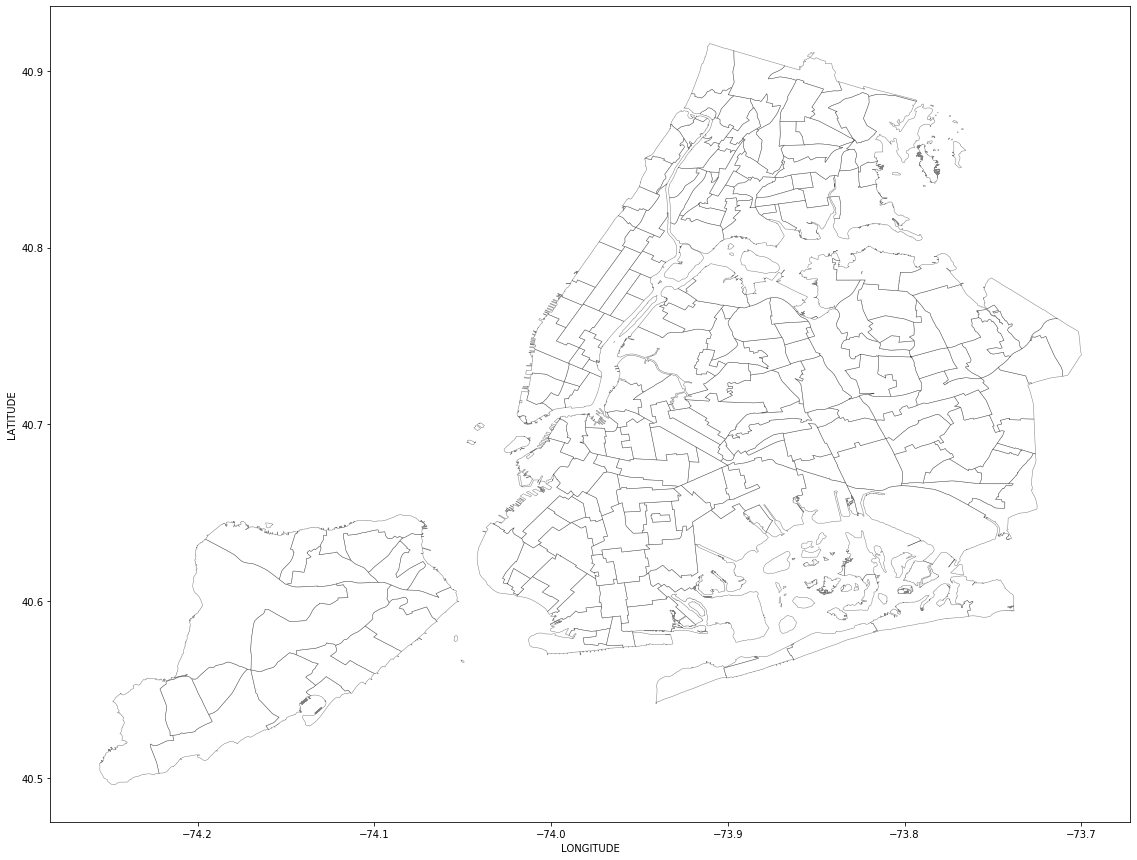

In [41]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' 
df_nyc = gpd.read_file(url)
ny_map = df_nyc.plot(linewidth=0.5, color='White', edgecolor = 'Black', figsize = (20,15), alpha=0.5)

#this calculation takes hella long, think about subsampling the data, also the heatmap didn't work even when testing with 20 points
data_test = null_data.head(20)
sns.kdeplot(
    data_test.LONGITUDE, data_test.LATITUDE,
    gridsize = 100,
    cmap = plt.cm.Reds,
    shade = True,
    shade_lowest = False,
    n_levels = 10,
    alpha = .5,
    ax = ny_map)